In [146]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
df= pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


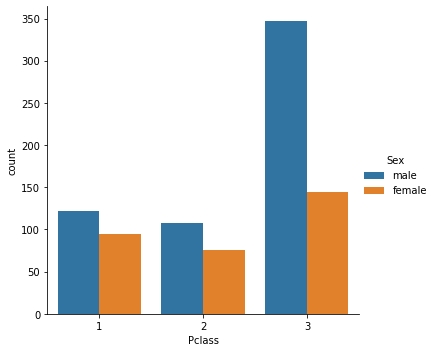

In [183]:
sns.catplot('Pclass', data=df, hue='Sex', kind='count')
plt.show()

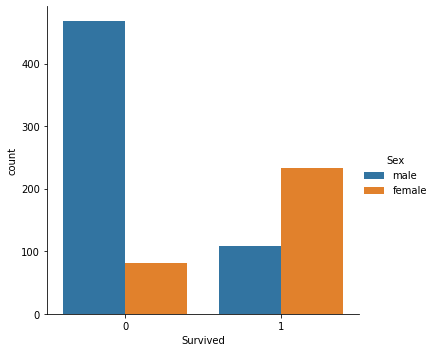

In [184]:
sns.catplot('Survived', data=df, hue='Sex', kind='count')

### Females are survived in majority

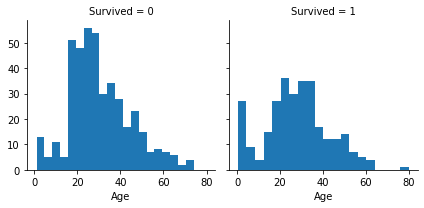

In [185]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [186]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
#remove null values we cant predict age by mode or mean so dropping those feilds
data=df.drop('Cabin',axis='columns')

In [188]:
data =df.drop('SibSp',axis='columns')
data =df.drop('Parch',axis='columns')

In [189]:
## categoral data to numerical data ##
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [229]:
#split trainig and testing dataset
X = data[['PassengerId','Sex']]
y = data['Survived']

In [230]:
X.head()

,PassengerId,Sex
0,1,male
1,2,female
2,3,female
3,4,female
4,5,male


In [231]:
## categoral data to numerical data ##
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [236]:
X=ohe.fit_transform(X[['Sex']])

In [214]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [245]:
print(X_train.shape)
print(y_train.shape)

(712, 2)
(712,)


In [246]:
print(X_test.shape)
print(y_test.shape)

(179, 2)
(179,)


In [294]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [295]:

X_train

array([[-0.7265652 ,  0.7265652 ],
       [ 1.37633896, -1.37633896],
       [ 1.37633896, -1.37633896],
       ...,
       [-0.7265652 ,  0.7265652 ],
       [-0.7265652 ,  0.7265652 ],
       [-0.7265652 ,  0.7265652 ]])

## KNN

In [296]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [297]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [298]:
knn.score(X_test, y_test)

0.7932960893854749

In [299]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[93, 19],
       [18, 49]], dtype=int64)

### Accuracy: 79.3%

## Bagging Classifier

In [301]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('Accuracy Score: ', bag.score(X_train, y_train))
y_pred2 = bag.predict(X_test)
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred2))

Accuracy Score:  0.7851123595505618
Confusion Matrix:  [[93 19]
 [18 49]]


### Accuracy: 78.5%

## Decision Tree Classifier

In [293]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Score: ', dt.score(X_test,y_test))
preed_y = dt.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preed_y)

Score:  0.7932960893854749


array([[93, 19],
       [18, 49]], dtype=int64)

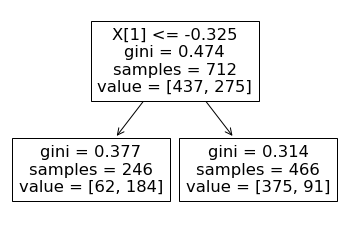

<Figure size 1440x1800 with 0 Axes>

In [292]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.figure(figsize = (20, 25))
plt.show()